In [1]:
# Final Analysis/Observations
# There is a very strong correlation with latitude and temperature in the northern hemisphere. As latitude increases the max temperature decreases. R-squared = 0.82
# There is almost no correlation with city latitude and the measured wind speed. 
# The majority of cities in this data set fall in the northern hemisphere.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [4]:
# Create Dataframe for Cities
cities_df = pd.DataFrame(cities, columns=['City'])

cities_df['Cloudiness'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temperature'] = ''
cities_df['Wind'] = ''
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind
0,camana,,,,,,,,
1,pevek,,,,,,,,
2,puerto ayora,,,,,,,,
3,vaini,,,,,,,,
4,honningsvag,,,,,,,,


In [5]:
# API Calls

base_url = 'http://api.openweathermap.org/data/2.5/weather?'

count = 0

print('Beginning Data Retrival')
print('-----------------------')
    
# for city in cities:
for index, row in cities_df.iterrows():
    try: 
        city = row['City']
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url).json()
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Max Temperature'] = response["main"]["temp_max"]
        cities_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        cities_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        cities_df.loc[index, 'Wind'] = response["wind"]["speed"]
        count = count + 1
        print(f'Processing {city}: Record {count} of {len(cities)}')
        time.sleep(1)
              
    except KeyError:
        count = count + 1
        print('City not found. Skipping...')

Beginning Data Retrival
-----------------------
Processing camana: Record 1 of 601
Processing pevek: Record 2 of 601
Processing puerto ayora: Record 3 of 601
Processing vaini: Record 4 of 601
Processing honningsvag: Record 5 of 601
Processing jamestown: Record 6 of 601
Processing atar: Record 7 of 601
Processing ushuaia: Record 8 of 601
Processing bredasdorp: Record 9 of 601
Processing saldanha: Record 10 of 601
City not found. Skipping...
Processing mecca: Record 12 of 601
Processing cape town: Record 13 of 601
Processing cayenne: Record 14 of 601
Processing punta arenas: Record 15 of 601
Processing richards bay: Record 16 of 601
Processing new norfolk: Record 17 of 601
Processing kudahuvadhoo: Record 18 of 601
Processing ajdabiya: Record 19 of 601
City not found. Skipping...
Processing ribeira grande: Record 21 of 601
Processing clyde river: Record 22 of 601
Processing ilulissat: Record 23 of 601
Processing zhangye: Record 24 of 601
Processing busselton: Record 25 of 601
Processing a

Processing cabedelo: Record 216 of 601
City not found. Skipping...
Processing boueni: Record 218 of 601
Processing dikson: Record 219 of 601
Processing notodden: Record 220 of 601
Processing araripina: Record 221 of 601
Processing contamana: Record 222 of 601
Processing dicabisagan: Record 223 of 601
Processing praia da vitoria: Record 224 of 601
Processing mazagao: Record 225 of 601
Processing sesheke: Record 226 of 601
Processing ureki: Record 227 of 601
Processing maningrida: Record 228 of 601
Processing lieksa: Record 229 of 601
City not found. Skipping...
Processing saint-pierre: Record 231 of 601
Processing torbay: Record 232 of 601
Processing lagoa: Record 233 of 601
Processing porbandar: Record 234 of 601
Processing sondrio: Record 235 of 601
Processing verkhoyansk: Record 236 of 601
Processing nikolskoye: Record 237 of 601
Processing taksimo: Record 238 of 601
City not found. Skipping...
Processing cairns: Record 240 of 601
Processing padilla: Record 241 of 601
Processing hith

Processing mosetse: Record 429 of 601
Processing vaghodia: Record 430 of 601
Processing icod de los vinos: Record 431 of 601
Processing coihaique: Record 432 of 601
Processing taywarah: Record 433 of 601
Processing nenjiang: Record 434 of 601
Processing wenling: Record 435 of 601
Processing arraial do cabo: Record 436 of 601
Processing severodvinsk: Record 437 of 601
Processing meadow lake: Record 438 of 601
Processing dalvik: Record 439 of 601
Processing awbari: Record 440 of 601
Processing atambua: Record 441 of 601
Processing wilmington: Record 442 of 601
Processing tucuman: Record 443 of 601
Processing buchanan: Record 444 of 601
Processing garowe: Record 445 of 601
Processing atkinson: Record 446 of 601
Processing gambela: Record 447 of 601
Processing gamba: Record 448 of 601
Processing ayagoz: Record 449 of 601
Processing san cristobal: Record 450 of 601
Processing oranjemund: Record 451 of 601
Processing morant bay: Record 452 of 601
Processing mackay: Record 453 of 601
Processi

In [8]:
cities_df.to_csv(output_data_file, index=False, header=True)
cities_df = pd.DataFrame(pd.read_csv(output_data_file))
cities_df = cities_df.dropna(how = 'any')
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind
0,camana,52.0,PE,1.580174e+09,83.0,-16.62,-72.71,68.90,5.26
1,pevek,64.0,RU,1.580174e+09,88.0,69.70,170.31,-3.51,3.65
2,puerto ayora,75.0,EC,1.580174e+09,61.0,-0.74,-90.35,82.40,4.70
3,vaini,75.0,TO,1.580174e+09,88.0,-21.20,-175.20,80.60,4.70
4,honningsvag,52.0,NO,1.580174e+09,64.0,70.98,25.97,22.19,18.21


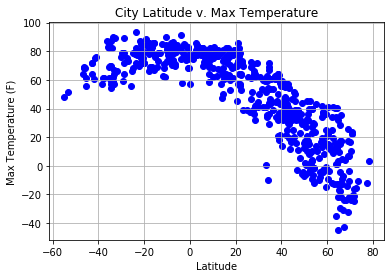

In [10]:
# latitude vs temperature plot

x_values = cities_df['Lat']
y_values = cities_df['Max Temperature']
plt.scatter(x_values, y_values, marker='o', color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude v. Max Temperature')
plt.grid()
plt.savefig('output_data/Fig1.png')
plt.show()

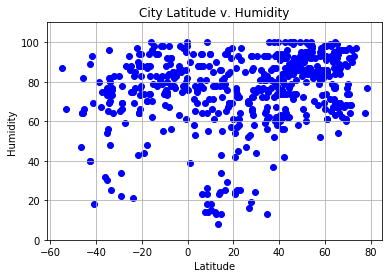

In [11]:
# Latitude v. Humidity Plot

x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values, y_values, marker='o', color='b')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude v. Humidity')
plt.ylim([0,110])
plt.grid()
plt.savefig('output_data/Fig2.png')
plt.show()

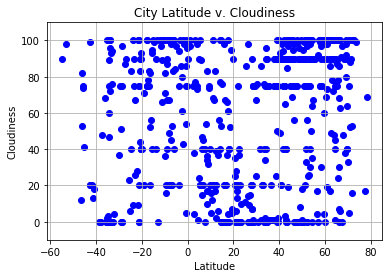

In [12]:
# Latitude vs. Cloudiness Plot

x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values, y_values, marker='o', color='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude v. Cloudiness')
plt.ylim([-10,110])
plt.grid()
plt.savefig('output_data/Fig3.png')
plt.show()

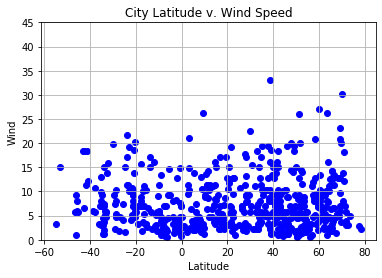

In [13]:
# Latitude vs. Windspeed Plot

x_values = cities_df['Lat']
y_values = cities_df['Wind']
plt.scatter(x_values, y_values, marker='o', color='b')
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title('City Latitude v. Wind Speed')
plt.ylim([0,45])
plt.grid()
plt.savefig('output_data/Fig4.png')
plt.show()

The r-squared value is 0.75


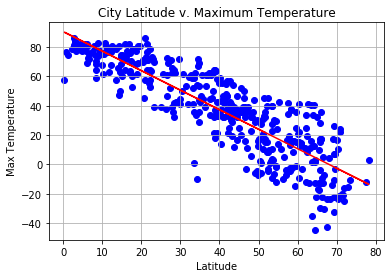

In [14]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
northern_cities = cities_df.copy()

indexnames = northern_cities[northern_cities['Lat'] < 0].index

northern_cities.drop(indexnames, inplace = True)

x_values = northern_cities['Lat'].astype(float)
y_values = northern_cities['Max Temperature'].astype(float)
plt.scatter(x_values, y_values, marker='o', color='b')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude v. Maximum Temperature')
plt.grid()
plt.show()


The r-squared value is 0.22


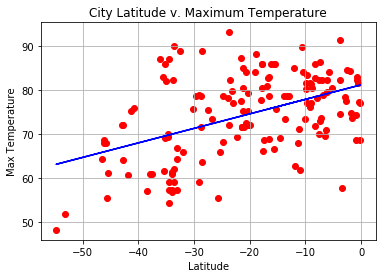

In [15]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
southern_cities = cities_df.copy()
southern_cities.count()
indexnames = southern_cities[southern_cities['Lat'] > 0].index

southern_cities.drop(indexnames, inplace = True)

x_values = southern_cities['Lat']
y_values = southern_cities['Max Temperature']
plt.scatter(x_values, y_values, marker='o', color='r')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude v. Maximum Temperature')
plt.grid()
plt.show()

The r-squared value is 0.14


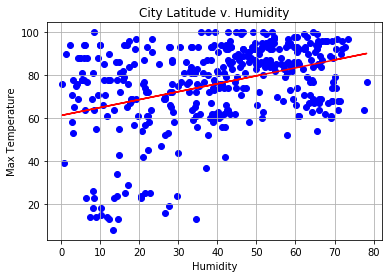

In [16]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_cities['Lat']
y_values = northern_cities['Humidity']
plt.scatter(x_values, y_values, marker='o', color='b')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Humidity')
plt.ylabel('Max Temperature')
plt.title('City Latitude v. Humidity')
plt.grid()
plt.show()

The r-squared value is 0.16


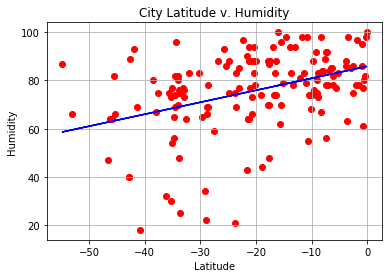

In [17]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_cities['Lat']
y_values = southern_cities['Humidity']
plt.scatter(x_values, y_values, marker='o', color='r')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude v. Humidity')
plt.grid()
plt.show()

The r-squared value is 0.1


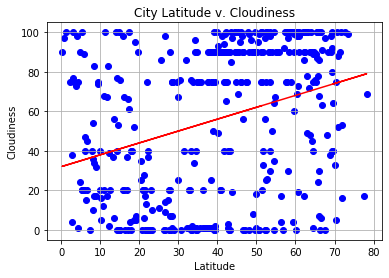

In [18]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_cities['Lat']
y_values = northern_cities['Cloudiness']
plt.scatter(x_values, y_values, marker='o', color='b')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude v. Cloudiness')
plt.grid()
plt.show()

The r-squared value is 0.09


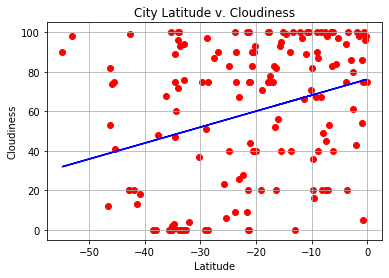

In [19]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_cities['Lat']
y_values = southern_cities['Cloudiness']
plt.scatter(x_values, y_values, marker='o', color='r')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude v. Cloudiness')
plt.grid()
plt.show()

The r-squared value is 0.01


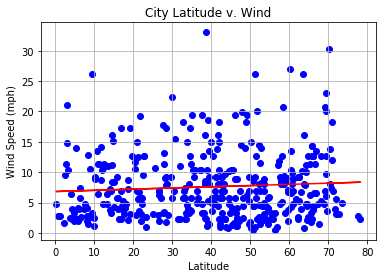

In [20]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_cities['Lat']
y_values = northern_cities['Wind']
plt.scatter(x_values, y_values, marker='o', color='b')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude v. Wind')
plt.grid()
plt.show()

The r-squared value is 0.05


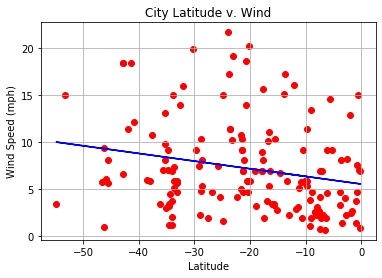

In [21]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_cities['Lat']
y_values = southern_cities['Wind']
plt.scatter(x_values, y_values, marker='o', color='r')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")

r_squared = round(r_value ** 2,2)

print(f'The r-squared value is {r_squared}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude v. Wind')
plt.grid()
plt.show()